In [47]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats

In [48]:
# Data File
filepath = ('../Resources/flavors_of_cacao.csv')

# Read CSV
df = pd.read_csv(filepath)
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [49]:
# Data Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [50]:
# Change Column Names
df.columns = [
    'company_maker', 
    'specific_bean_origin_or_bar_name', 
    'ref', 
    'review_date', 
    'cocoa_percent', 
    'company_location', 
    'rating', 
    'bean_type', 
    'broad_bean_origin'
]

print(df.columns)

Index(['company_maker', 'specific_bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin'],
      dtype='object')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [52]:
df.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [53]:
# Drop the Bean Type Column
df2 = df.drop(columns=['bean_type'])

df2.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [54]:
df_cleaned = df2.dropna()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1794 non-null   object 
 1   specific_bean_origin_or_bar_name  1794 non-null   object 
 2   ref                               1794 non-null   int64  
 3   review_date                       1794 non-null   int64  
 4   cocoa_percent                     1794 non-null   object 
 5   company_location                  1794 non-null   object 
 6   rating                            1794 non-null   float64
 7   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 126.1+ KB


In [55]:
# Fix misspellings of Countries and Cities. 

df_cleaned['company_location'] = df_cleaned['company_location'].replace({
    'Eucador':'Ecuador', 
    'Niacragua':'Nicaragua', 
    'Amsterdam':'Netherlands',
    'Dominican Republic': 'Dominican Republic'
    })

df_cleaned['company_location'].unique()

/var/folders/7s/yj1x048507x6rv5qp0nlrsp00000gn/T/ipykernel_54077/2170562998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['company_location'] = df_cleaned['company_location'].replace({


array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Scotland', 'Martinique', 'Sao Tome',
       'Argentina', 'Guatemala', 'South Africa', 'Bolivia', 'St. Lucia',
       'Portugal', 'Singapore', 'Denmark', 'Vietnam', 'Grenada', 'Israel',
       'India', 'Czech Republic', 'Domincan Republic', 'Finland',
       'Madagascar', 'Philippines', 'Sweden', 'Poland', 'Austria',
       'Honduras', 'Nicaragua', 'Lithuania', 'Chile', 'Ghana', 'Iceland',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [56]:
# Renamed spelling errors and blended countries in broad bean origin column
df_cleaned['broad_bean_origin'].fillna('')

df_cleaned.loc[:, 'broad_bean_origin'] = df_cleaned['broad_bean_origin'].replace({
    '': 'Unknown Countries', #I can't get the empty cells to rename
    'Africa, Carribean, C. Am.': 'Blended Countries',
    'Carribean(DR/Jam/Tri)': 'Blended Countries',
    'Carribean': 'Blended Countries',
    'Central and S. America': 'Blended Countries',
    'Colombia, Ecuador': 'Blended Countries',
    'Cost Rica, Ven': 'Blended Countries',
    'Dom. Rep., Madagascar': 'Blended Countries',
    'Dominican Rep., Bali': 'Blended Countries',
    'Domincan Republic': 'Dominican Republic',
    'DR, Ecuador, Peru': 'Blended Countries',
    'Ecuador, Costa Rica': 'Blended Countries',
    'Ecuador, Mad., PNG': 'Blended Countries',
    'Ghana & Madagascar': 'Blended Countries',
    'Ghana, Domin. Rep': 'Blended Countries',
    'Ghana, Panama, Ecuador': 'Blended Countries',
    'Gre., PNG, Haw., Haiti, Mad': 'Blended Countries',
    'Guat., D.R., Peru, Mad., PNG': 'Blended Countries',
    'Indonesia, Ghana': 'Blended Countries',
    'Mad., Java, PNG': 'Blended Countries',
    'Madagascar & Ecuador': 'Blended Countries',
    'Peru, Belize': 'Blended Countries',
    'Peru, Dom. Rep': 'Blended Countries',
    'Peru, Ecuador': 'Blended Countries',
    'Peru, Ecuador, Venezuela': 'Blended Countries',
    'Peru, Mad., Dom. Rep.': 'Blended Countries',
    'Peru, Madagascar': 'Blended Countries',
    'Peru(SMartin,Pangoa,nacional)': 'Blended Countries',
    'PNG, Vanuatu, Mad': 'Blended Countries',
    'Sao Tome & Principe': 'Blended Countries',
    'South America': 'Blended Countries',
    'South America, Africa': 'Blended Countries',
    'Trinidad-Tobago': 'Blended Countries',
    'Trinidad, Ecuador': 'Blended Countries',
    'Trinidad, Tobago': 'Blended Countries',
    'Ven, Bolivia, D.R.': 'Blended Countries',
    'Ven, Trinidad, Ecuador': 'Blended Countries',
    'Ven., Indonesia, Ecuad.': 'Blended Countries',
    'Ven., Trinidad, Mad.': 'Blended Countries',
    'Ven.,Ecu.,Peru,Nic.': 'Blended Countries',
    'Venez,Africa,Brasil,Peru,Mex': 'Blended Countries',
    'Venezuela, Carribean': 'Blended Countries',
    'Venezuela, Dom. Rep.': 'Blended Countries',
    'Venezuela, Ghana': 'Blended Countries',
    'Venezuela, Java': 'Blended Countries',
    'Venezuela, Trinidad': 'Blended Countries',
    'Venezuela/ Ghana': 'Blended Countries',
    'Blended': 'Blended Countries'
})

In [57]:
# Clean Up Percent Symbol in CSV
df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: cocoa_percent, Length: 1794, dtype: float64

In [58]:
df_cleaned['cocoa_percent'] = df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)

/var/folders/7s/yj1x048507x6rv5qp0nlrsp00000gn/T/ipykernel_54077/677244272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cocoa_percent'] = df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)


In [59]:
df_cleaned.to_csv('../Resources/updated_flavors_of_cacao.csv')

In [60]:
print(df_cleaned.broad_bean_origin)

0       Sao Tome
1           Togo
2           Togo
3           Togo
4           Peru
          ...   
1790        Peru
1791       Congo
1792       India
1793       India
1794      Brazil
Name: broad_bean_origin, Length: 1794, dtype: object


In [61]:
#data to view the number of manufacturing companies per country
df_cleaned['company_location'].value_counts()

company_location
U.S.A.               763
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               55
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Brazil                17
Madagascar            17
Peru                  17
Japan                 17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Argentina              9
Costa Rica             9
Poland                 8
Netherlands            8
Lithuania              6
Nicaragua              6
Honduras               6
Domincan Republic      5
South Korea            5
Sweden                 5
Sao Tome               4
Fiji                   4
Mexico                 4
Ireland                4
Puerto R

In [62]:
#thats too many countries. look at the top 10 and create new df
top_countries = df_cleaned['company_location'].value_counts().head(10).reset_index()
top_countries.columns = ['company_location', 'count']
top_countries.head()

,company_location,count
0,U.S.A.,763
1,France,156
2,Canada,125
3,U.K.,96
4,Italy,63


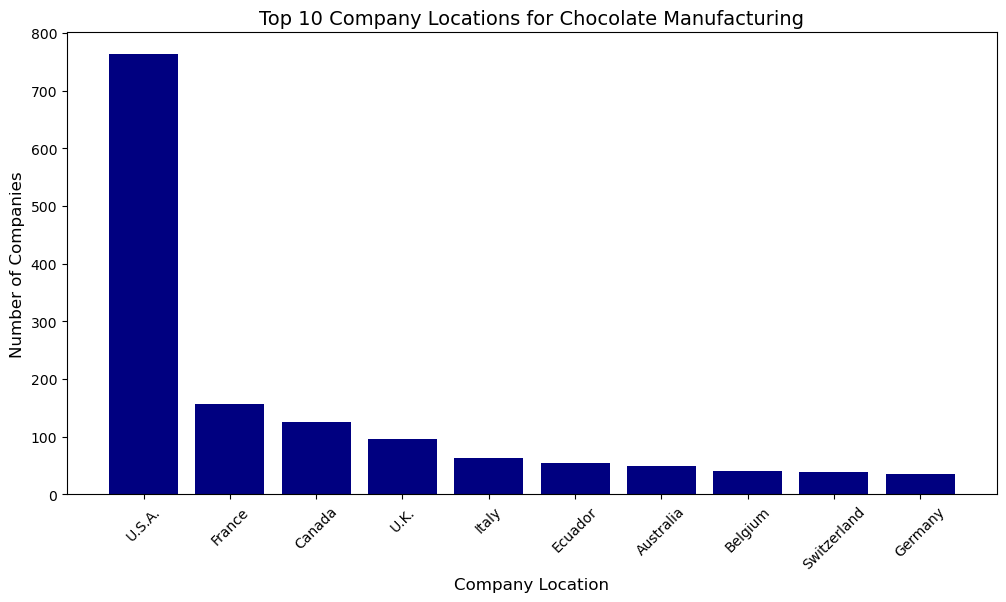

In [63]:
#bar chart
plt.figure(figsize=(12, 6))

plt.bar(top_countries['company_location'], top_countries['count'], color='navy')
plt.title('Top 10 Company Locations for Chocolate Manufacturing', fontsize=14)
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45)

# Save chart as image
plt.savefig("top_10_company_locations_for_chocolate_manufacturing.png")

plt.show()

In [64]:
#number of rewviews per year
reviews = df_cleaned['review_date'].value_counts()
print(reviews)

review_date
2015    285
2014    247
2016    219
2012    194
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: count, dtype: int64


In [65]:
#make that into a dateframe with counts
reviews = df_cleaned['review_date'].value_counts().reset_index()
reviews.columns = ['review_date', 'count']
sorted_reviews = reviews.sort_values(by='review_date', ascending=True)
sorted_reviews.head()

,review_date,count
10,2006,72
9,2007,77
8,2008,93
6,2009,123
7,2010,111


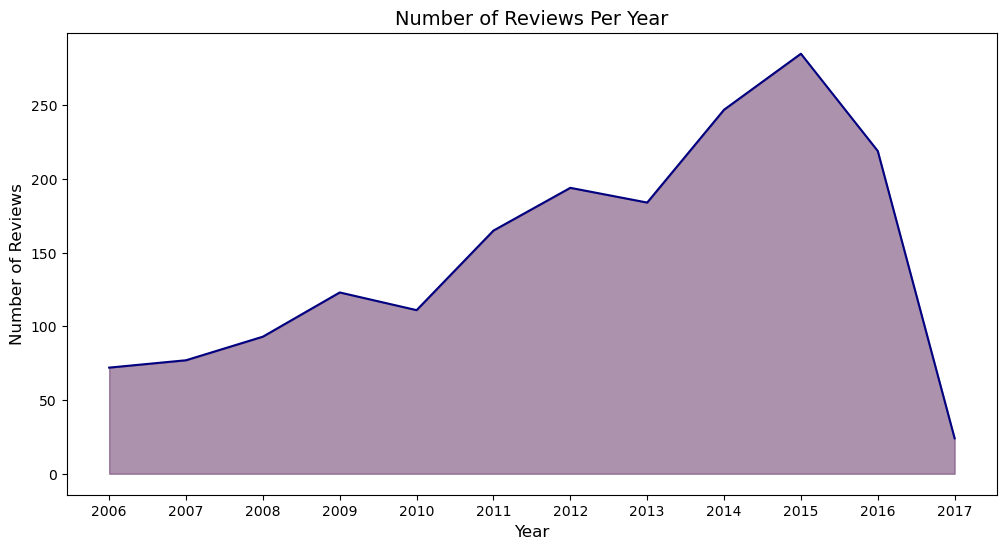

In [66]:
#bar chart to show how many reveiws per year
plt.figure(figsize=(12, 6))
plt.fill_between(sorted_reviews['review_date'], sorted_reviews['count'], color="#5C265F", alpha=0.5)  # Fill the area under the line
plt.plot(sorted_reviews['review_date'], sorted_reviews['count'], color='navy')
plt.title('Number of Reviews Per Year', fontsize=14)
plt.xticks(sorted_reviews['review_date'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Save chart as image
plt.savefig("number_of_reviews_per_year.png")

plt.show()

In [67]:
#review count by company
company_review = df_cleaned.groupby(['review_date', 'company_maker'])['review_date'].value_counts()
print(company_review)

review_date  company_maker         
2006         Amedei                    2
             Bonnat                    7
             Cote d' Or (Kraft)        1
             Dolfin (Belcolade)        1
             Domori                    3
                                      ..
2017         Madre                     1
             Smooth Chocolator, The    1
             Soul                      6
             Spencer                   3
             Xocolla                   2
Name: count, Length: 728, dtype: int64


In [68]:
company_review = df_cleaned.groupby(['company_maker', 'review_date'])['review_date'].value_counts().reset_index()
company_reviews = company_review
company_reviews.head()

,company_maker,review_date,count
0,A. Morin,2012,2
1,A. Morin,2013,11
2,A. Morin,2014,5
3,A. Morin,2015,4
4,A. Morin,2016,1


In [69]:
# Sort Cocoa Percentage for US only
us_chocolate = df_cleaned[df_cleaned['company_location'].isin(['U.S.A.'])]

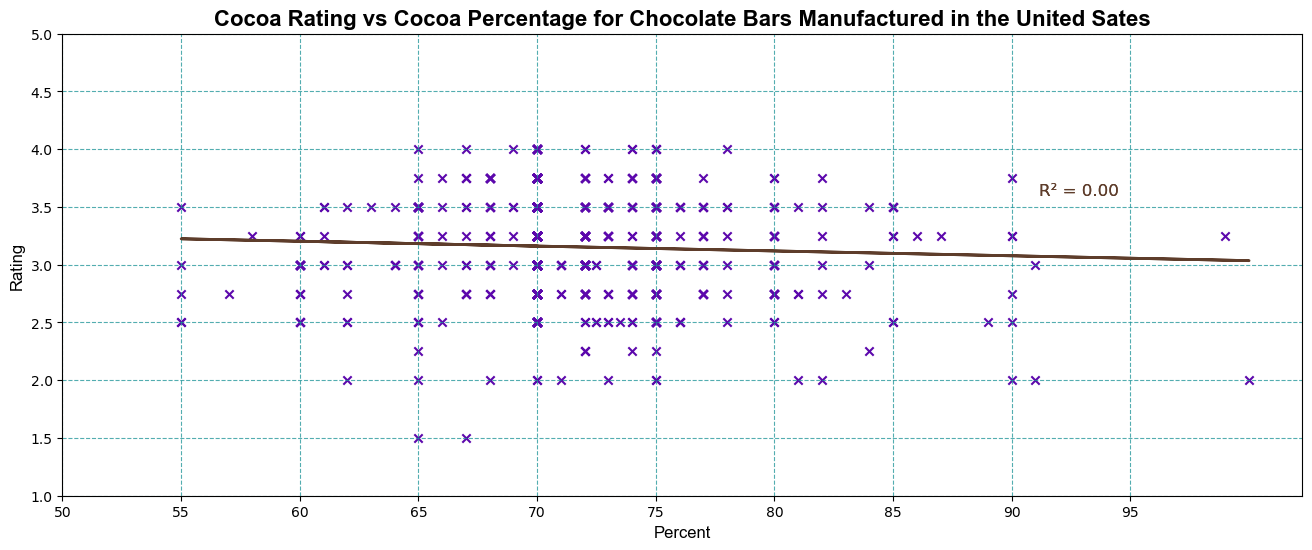

In [70]:


# make a scatter plot
# Change Canvas Size
plt.figure(figsize=(16, 6))
# Create a basic plot
plt.scatter(us_chocolate.cocoa_percent, us_chocolate.rating, color="#5C08AC", marker="x")

#regression line
slope, intercept, rvalue, pvalue, stderr = linregress(us_chocolate.cocoa_percent, us_chocolate.rating)
regression_line = slope * us_chocolate.cocoa_percent + intercept
plt.plot(us_chocolate.cocoa_percent, regression_line, color="#5E3D2B", linewidth=2, label='Regression Line')
r_squared = rvalue**2
plt.text(0.82, 0.65, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color="#5E3D2B", ha='center')

# Customizations
ticks = np.arange(50, 100, 5)
plt.xticks(ticks)
# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylim(1,5)
plt.xlabel("Percent", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Cocoa Rating vs Cocoa Percentage for Chocolate Bars Manufactured in the United Sates", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(linestyle="--", color="#199296", alpha=0.75)
plt.text(0.82, 0.65, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color="#5E3D2B", ha='center')
# Show plot
plt.show()

In [71]:
print(r_squared)

0.0025845133301380893


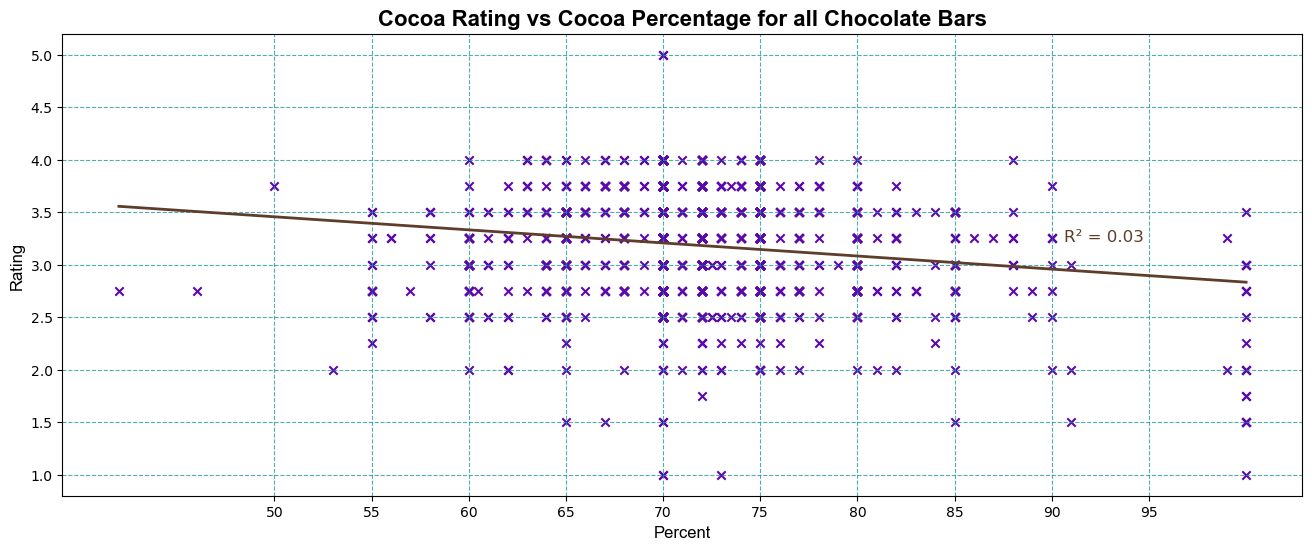

In [74]:

chocolate = df_cleaned.sort_values(by='cocoa_percent', ascending=True)
# make a scatter plot
# Change Canvas Size
plt.figure(figsize=(16, 6))
# Create a basic plot
plt.scatter(chocolate.cocoa_percent, chocolate.rating, color="#5C08AC", marker="x")

#regression line
slope, intercept, rvalue, pvalue, stderr = linregress(chocolate.cocoa_percent, chocolate.rating)
regression_line = slope * chocolate.cocoa_percent + intercept
plt.plot(chocolate.cocoa_percent, regression_line, color="#5E3D2B", linewidth=2, label='Regression Line')
r_squared = rvalue**2
plt.text(0.84, 0.55, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color="#5E3D2B", ha='center')

# Customizations
ticks = np.arange(50, 100, 5)
plt.xticks(ticks)
# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Percent", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Cocoa Rating vs Cocoa Percentage for all Chocolate Bars", fontweight="bold", fontsize=16, fontfamily="Arial")
# Add in a background grid
plt.grid(linestyle="--", color="#199296", alpha=0.75)
# Show plot
plt.show()

In [75]:
# Broad Bean Origin Count
df_cleaned['broad_bean_origin'].value_counts()

broad_bean_origin
Venezuela             214
Ecuador               193
Dominican Republic    166
Peru                  165
Madagascar            145
                       73
Blended Countries      67
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Hawaii                 28
Guatemala              28
Jamaica                20
Grenada                19
Indonesia              16
Honduras               15
Cuba                   11
Congo                  10
Sao Tome               10
Haiti                   9
Fiji                    8
St. Lucia               8
Uganda                  8
Panama                  7
Vanuatu                 7
West Africa             6
Philippines             5
Ivory Coast             5
Solomon Islands     

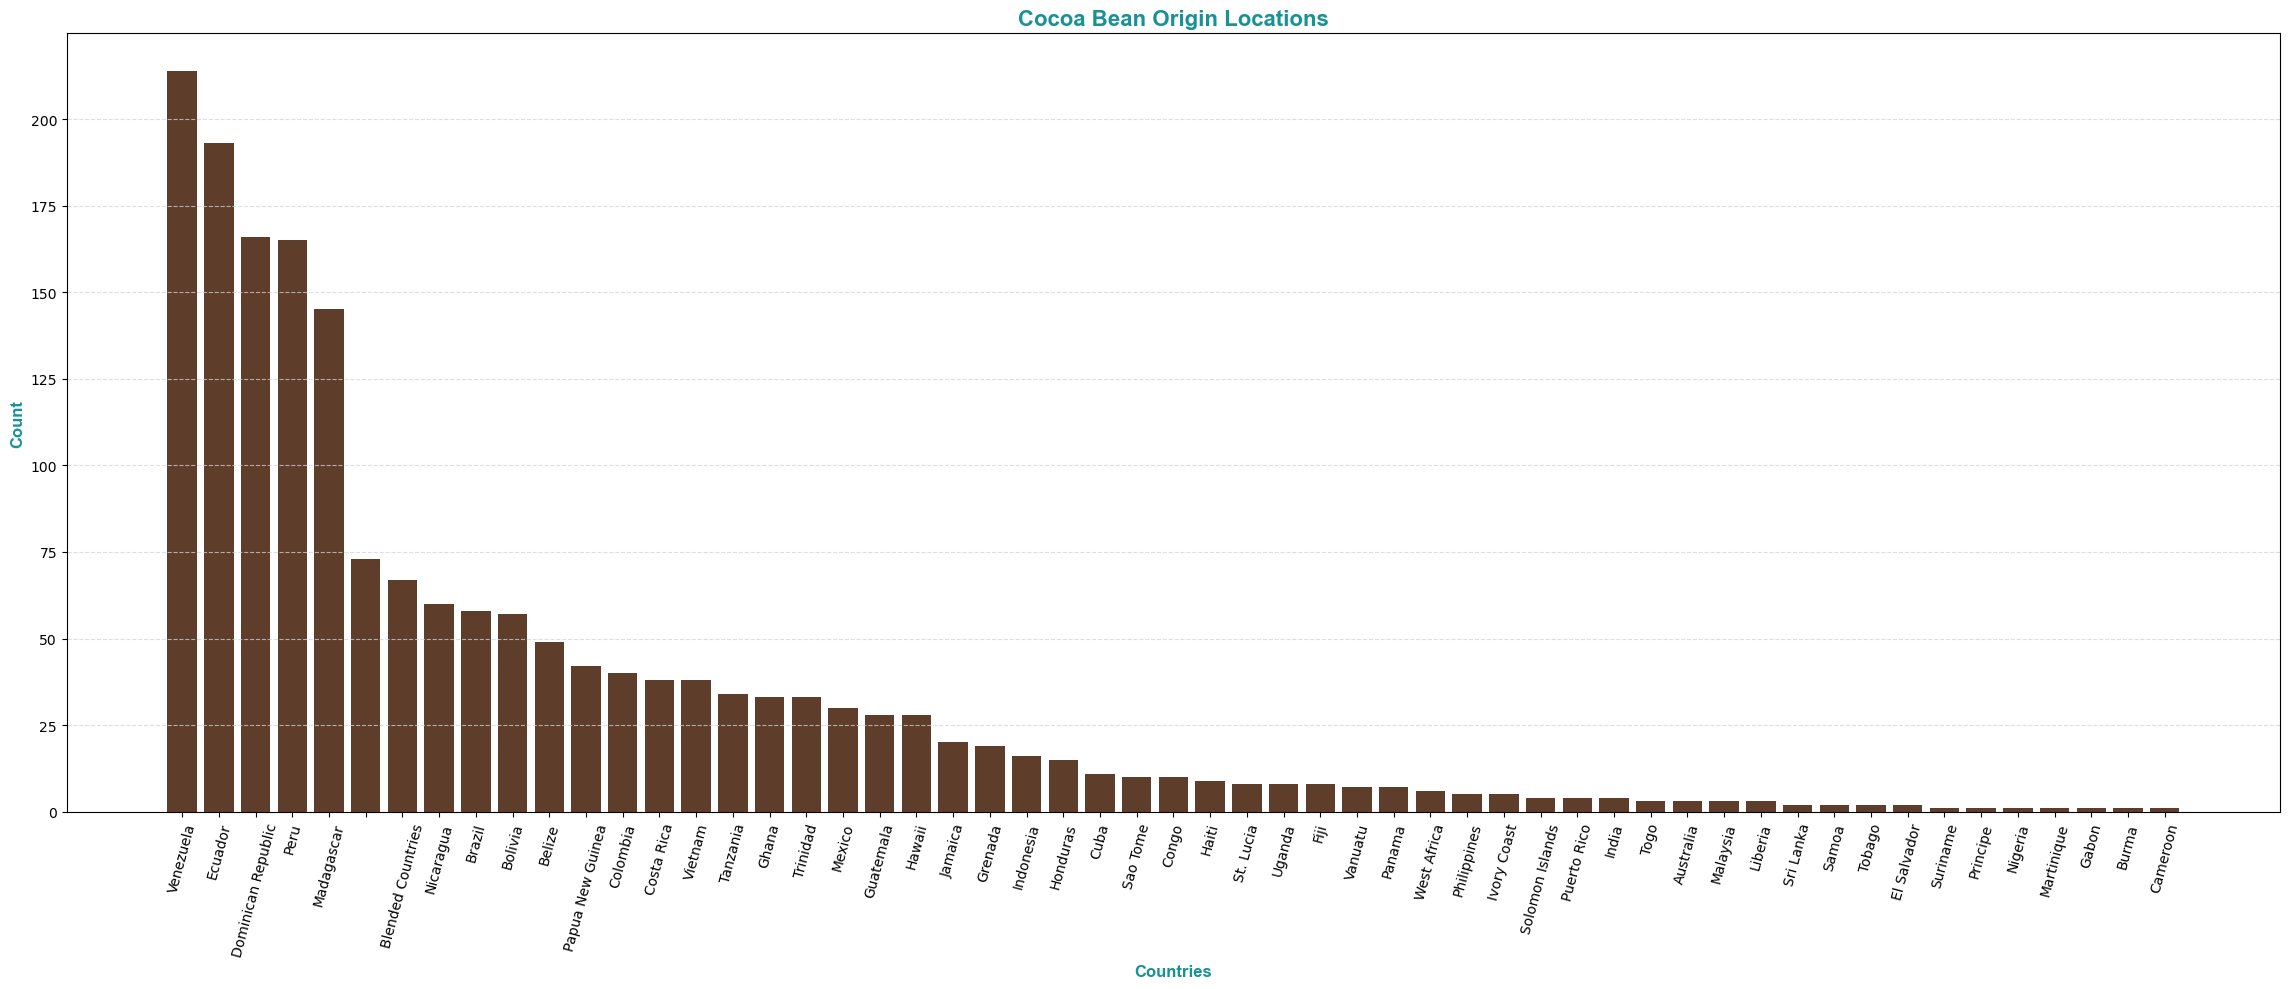

In [76]:
# Bar Graph for Bean Type Origin
# Data
data = df_cleaned.groupby("broad_bean_origin").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(23, 10))

# Create a basic plot
plt.bar(data.index, data.values, color="#5E3D2B", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Countries", fontfamily="Arial", fontsize=12, color='#199296', weight='bold')
plt.xticks(rotation=75)
plt.ylabel("Count", fontfamily="Arial", fontsize=12, color='#199296', weight='bold')
plt.title("Cocoa Bean Origin Locations", fontweight="bold", fontsize=16, fontfamily="Arial", color='#199296')
plt.tight_layout()

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Save chart as image
plt.savefig("cocoa_bean_origin_locations.png")

# Show/Save the Graph
plt.show()

In [77]:
# We need to shorten the amount of countries
top_10_countries = df_cleaned['broad_bean_origin'].value_counts().head(10).reset_index()
top_10_countries.columns = ['broad_bean_origin', 'count']

top_10_countries.head(10)

,broad_bean_origin,count
0,Venezuela,214
1,Ecuador,193
2,Dominican Republic,166
3,Peru,165
4,Madagascar,145
5,,73
6,Blended Countries,67
7,Nicaragua,60
8,Brazil,58
9,Bolivia,57


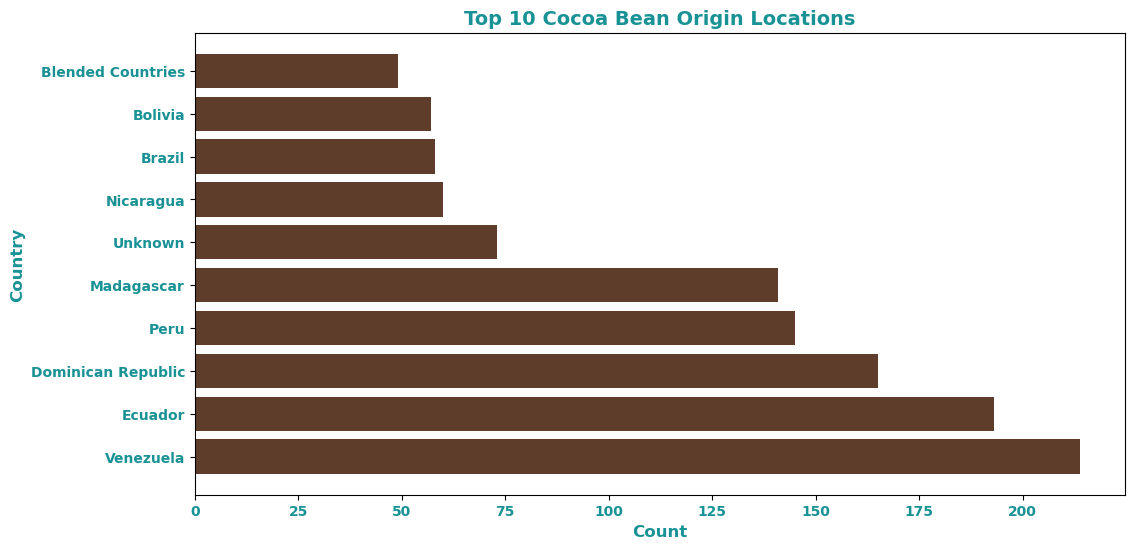

In [78]:
# Top 10 Bar Graph
# Data
top_10_countries = pd.DataFrame({
    'broad_bean_origin': ['Venezuela', 'Ecuador', 'Dominican Republic', 'Peru', 'Madagascar', None, 'Nicaragua', 'Brazil', 'Bolivia', 'Blended Countries'],
    'count': [214, 193, 165, 145, 141, 73, 60, 58, 57, 49]
}) 

# Replace empty or NaN values in 'broad_bean_origin' column with "Unknown"
top_10_countries['broad_bean_origin'] = top_10_countries['broad_bean_origin'].replace(['', None], 'Unknown')

# Plot
plt.figure(figsize=(12, 6))

# Use horizontal bars
plt.barh(top_10_countries['broad_bean_origin'], top_10_countries['count'], color='#5E3D2B')

# Title and labels
plt.title('Top 10 Cocoa Bean Origin Locations', fontsize=14, color='#199296', weight='bold')
plt.xlabel('Count', fontsize=12, color='#199296', weight='bold')
plt.ylabel('Country', fontsize=12, color='#199296', weight='bold')

# Ticks styling
plt.xticks(color='#199296', weight='bold')
plt.yticks(color='#199296', weight='bold')

# Save chart as image
plt.savefig("top_10_cocoa_bean_origin_locations.png")

# Show the plot
plt.show()

In [79]:
# Top 10 company locations
top_10_company = (df_cleaned['company_location'].value_counts()).iloc[:10]
top_10_company.columns = ['company_location', 'count']

top_10_company.head(10) 

company_location
U.S.A.         763
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         55
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: count, dtype: int64

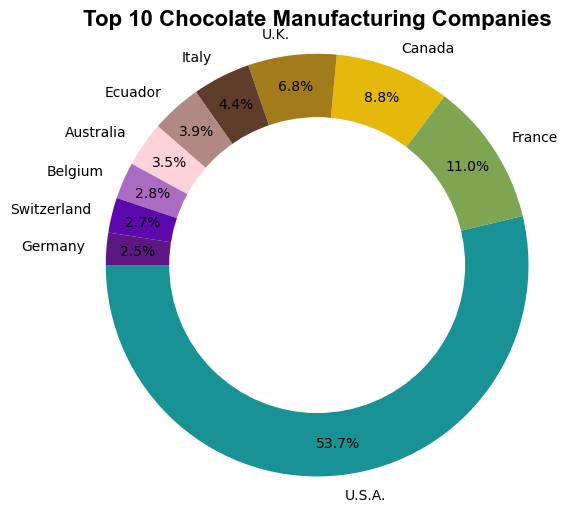

In [80]:
# Create data to be used for donut chart

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list("gradient", ["#199296", "#E4B90C", "#5E3D2B", "#FED2D9", "#5C08AC", "#5C265F"])

# Create figure with adjusted size
plt.figure(figsize=(6, 6))

# Create the pie chart
wedges, texts, autotexts = plt.pie(top_10_company.values, labels=top_10_company.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)

# Apply the gradient to each wedge
for i, wedge in enumerate(wedges):
    # The gradient color for each wedge is determined by its position in the data (i.e., index)
    wedge.set_facecolor(cmap(i / len(wedges)))  # Apply gradient color

# DONUT: Create the white center circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Add title
plt.title("Top 10 Chocolate Manufacturing Companies", fontweight="bold", fontsize=16, fontfamily="Arial")

# Ensure the plot is circular
plt.axis("equal")

# Save chart as image
plt.savefig("top_10_chocolate_manufacturing_companies.png")

# Show the plot
plt.show()

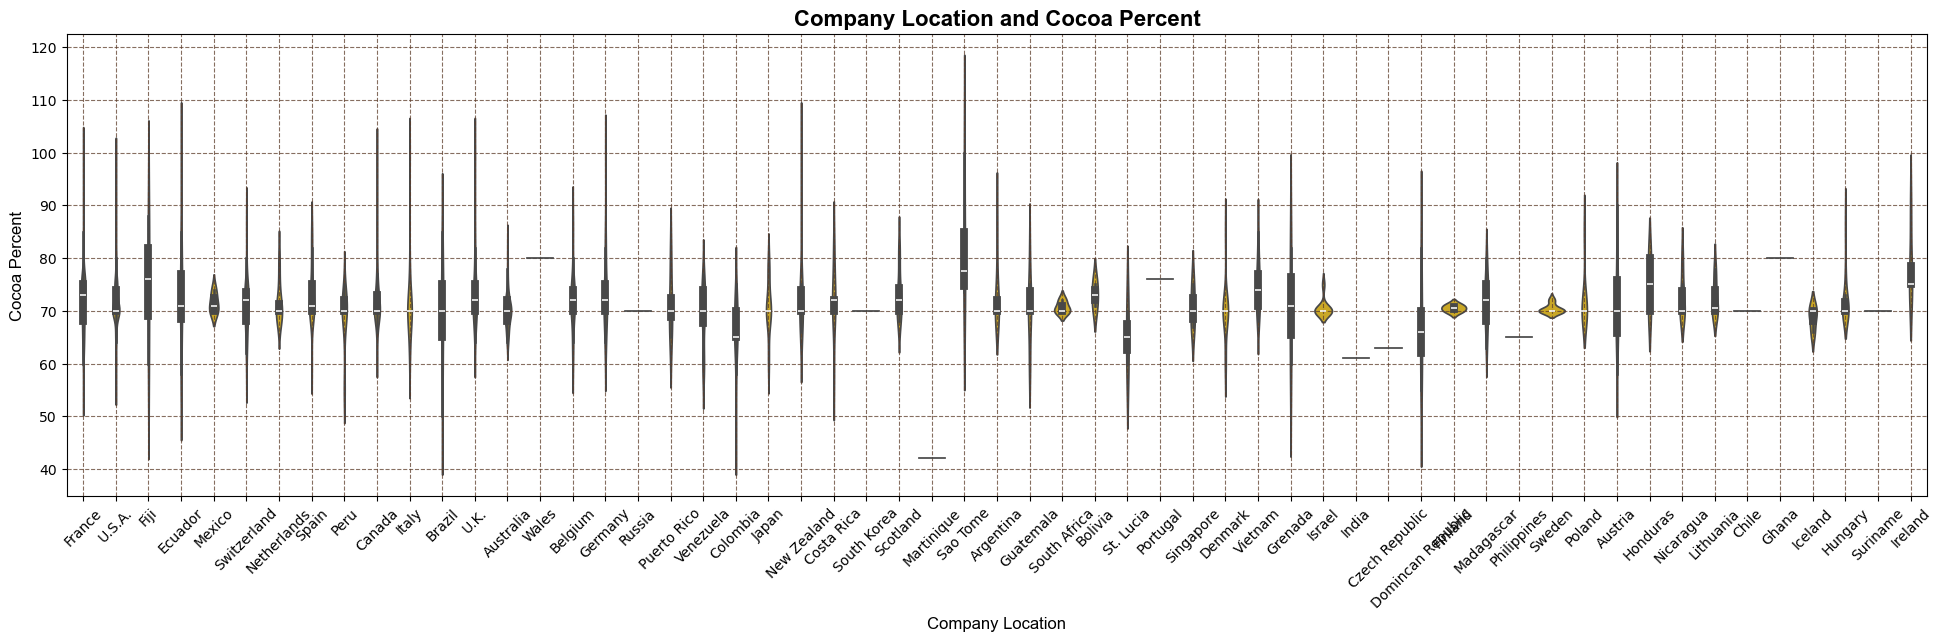

In [81]:
# Violin Plot: Comparison of company location and the cocoa solids percentage. 
# Change Canvas Size
plt.figure(figsize=(24, 6))

# Create a basic plot
sns.violinplot(data=df_cleaned, x="company_location", y="cocoa_percent", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Cocoa Percent", fontfamily="Arial", fontsize=12)
plt.title("Company Location and Cocoa Percent", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("company_location_and_cocoa_percent.png")

# Show/Save the Graph
plt.show()

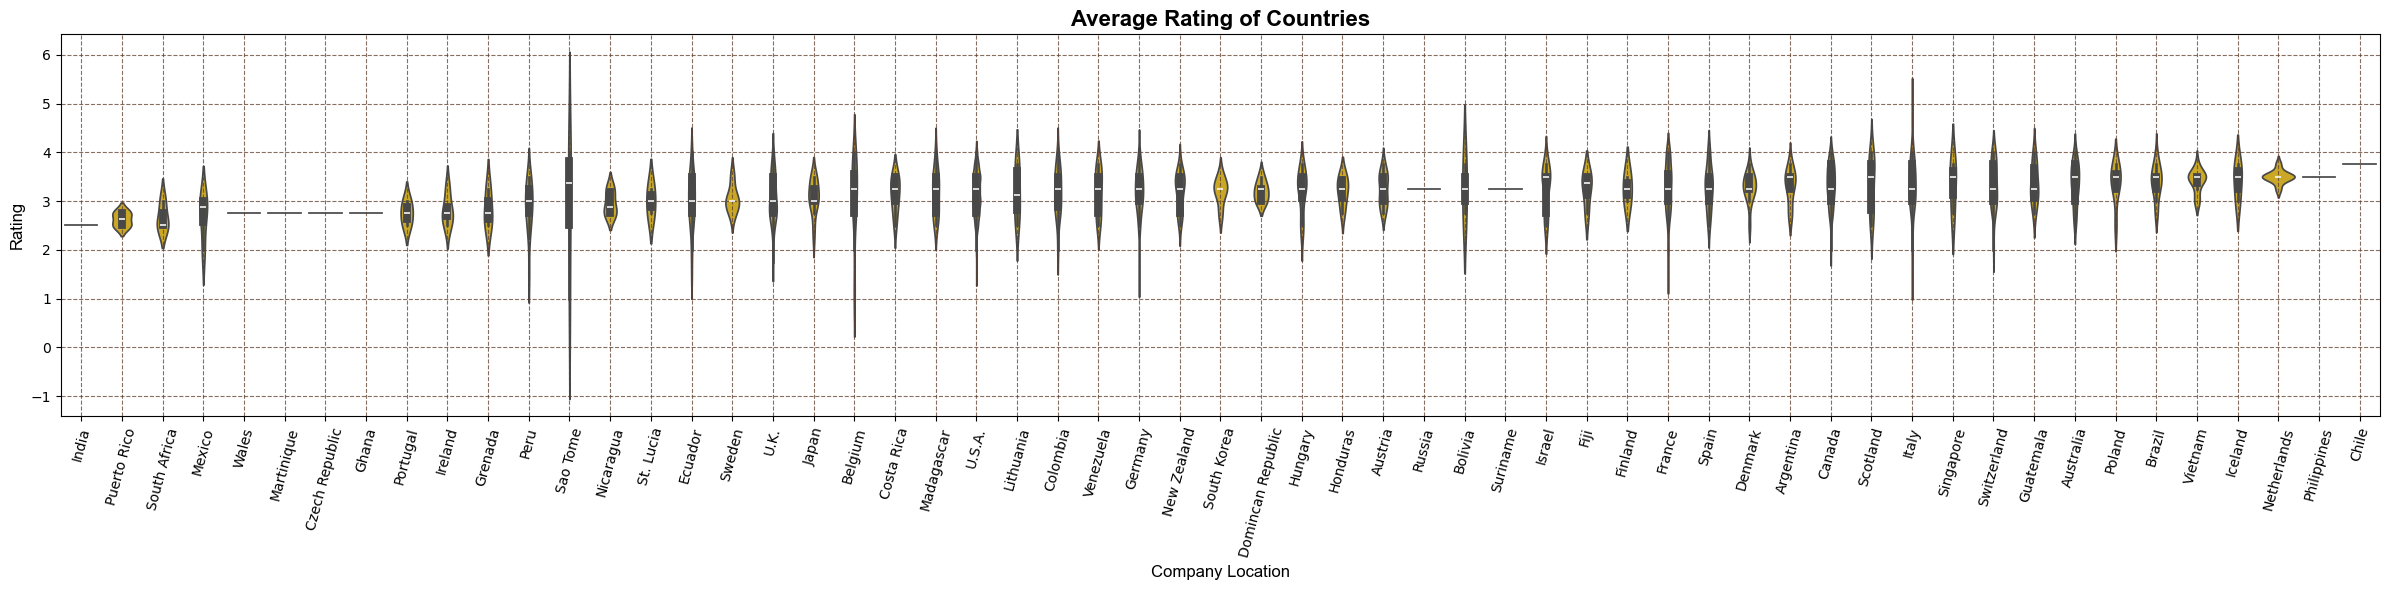

In [82]:
# Violin Plot: Comparison of company location and the cocoa solids percentage. 
sorted_avg_rating = df_cleaned.groupby("company_location")['rating'].mean().sort_values(ascending=True).index

# Change Canvas Size
plt.figure(figsize=(24, 6))

# Create a basic plot
sns.violinplot(data=df_cleaned, x="company_location", y="rating", color="#e5b80b", order=sorted_avg_rating)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Average Rating of Countries", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=75) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("avg_rating_by_countries.png")

# Show/Save the Graph
plt.tight_layout() 
plt.show()

In [83]:
avg_ratings = df_cleaned.groupby('company_location')['rating'].mean()
avg_ratings_sorted = avg_ratings.sort_values(ascending=False)
print(avg_ratings_sorted)

company_location
Chile                3.750000
Philippines          3.500000
Netherlands          3.500000
Iceland              3.416667
Vietnam              3.409091
Brazil               3.397059
Poland               3.375000
Australia            3.357143
Guatemala            3.350000
Switzerland          3.342105
Singapore            3.333333
Italy                3.325397
Scotland             3.325000
Canada               3.324000
Argentina            3.305556
Denmark              3.283333
Spain                3.270000
France               3.251603
Bolivia              3.250000
Russia               3.250000
Israel               3.250000
Suriname             3.250000
Finland              3.250000
Fiji                 3.250000
Austria              3.240385
Honduras             3.208333
Hungary              3.204545
South Korea          3.200000
Domincan Republic    3.200000
New Zealand          3.191176
Germany              3.178571
Venezuela            3.175000
Colombia             3.

In [84]:
# Too many countries Group Top Ten Locations
top_ten_location = df_cleaned.groupby("company_location")['rating'].mean().sort_values(ascending=True).nlargest(10).index
print(top_ten_location)

Index(['Chile', 'Netherlands', 'Philippines', 'Iceland', 'Vietnam', 'Brazil',
       'Poland', 'Australia', 'Guatemala', 'Switzerland'],
      dtype='object', name='company_location')


In [85]:
df_cleaned['company_location'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Scotland', 'Martinique', 'Sao Tome',
       'Argentina', 'Guatemala', 'South Africa', 'Bolivia', 'St. Lucia',
       'Portugal', 'Singapore', 'Denmark', 'Vietnam', 'Grenada', 'Israel',
       'India', 'Czech Republic', 'Domincan Republic', 'Finland',
       'Madagascar', 'Philippines', 'Sweden', 'Poland', 'Austria',
       'Honduras', 'Nicaragua', 'Lithuania', 'Chile', 'Ghana', 'Iceland',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

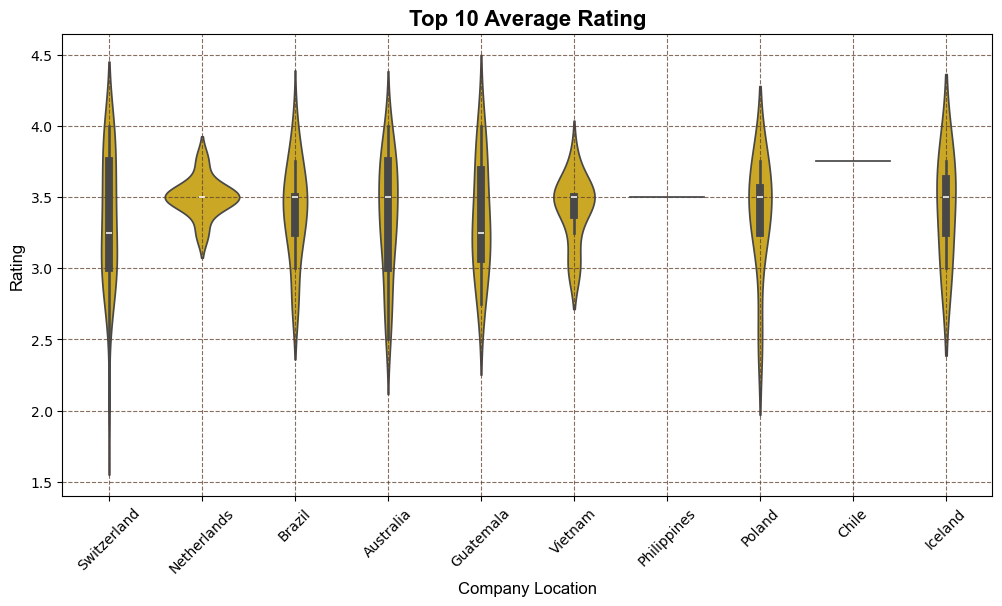

In [86]:
# Narrow down to Top 10 Company Locations
filtered_top_ten = df_cleaned[df_cleaned['company_location'].isin(top_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=filtered_top_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Top 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("top_ten_avg_cocoa_percent_by_location.png")

# Show/Save the Graph
plt.show()

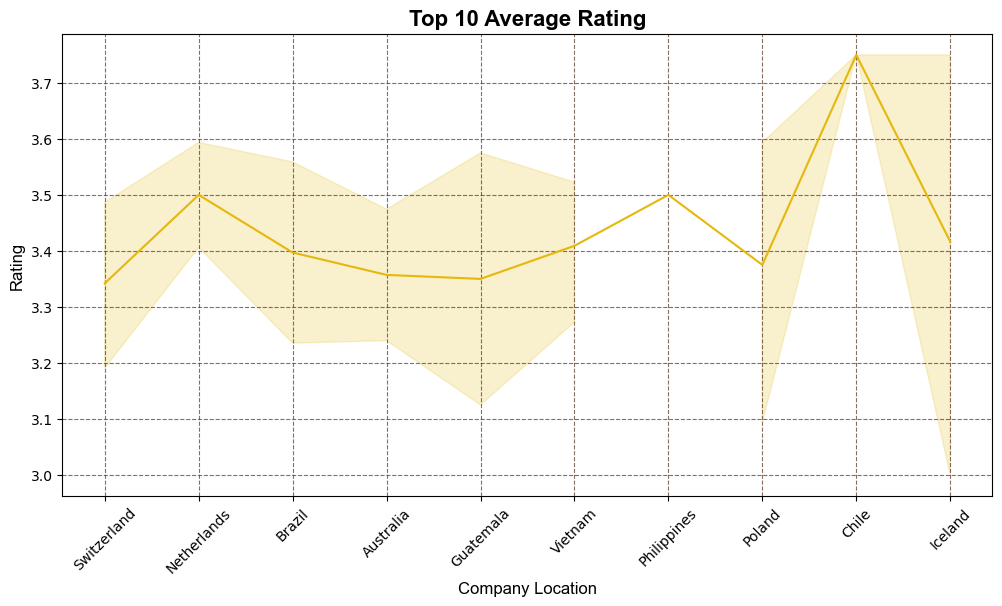

In [87]:
# Narrow down to Top 10 Company Locations
filtered_top_ten = df_cleaned[df_cleaned['company_location'].isin(top_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.lineplot(data=filtered_top_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Top 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("top_ten_avg_cocoa_percent_by_location.png")

# Show/Save the Graph
plt.show()

In [88]:
# Find Lowest 10
lowest_ten_location = df_cleaned.groupby("company_location")['rating'].mean().nsmallest(10).index
print(lowest_ten_location)

Index(['India', 'Puerto Rico', 'South Africa', 'Mexico', 'Czech Republic',
       'Ghana', 'Martinique', 'Portugal', 'Wales', 'Ireland'],
      dtype='object', name='company_location')


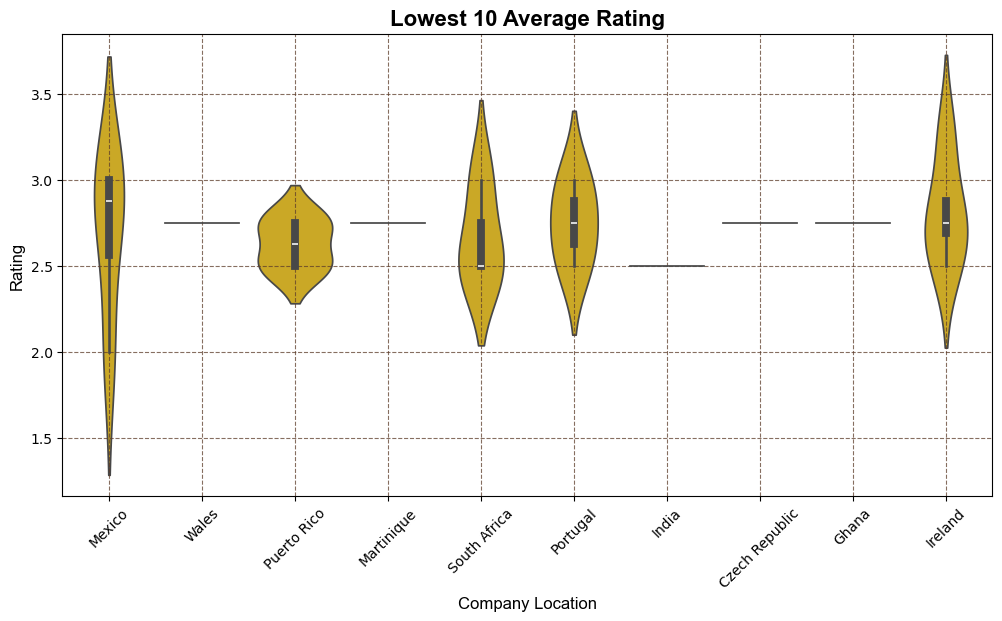

In [89]:
# Narrow down to Lowest 10 Company Locations
filtered_lowest_ten = df_cleaned[df_cleaned['company_location'].isin(lowest_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=filtered_lowest_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Lowest 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)
# plt.xlim(0,20)

# Save chart as image
plt.savefig("lowest_ten_avg_cocoa_percent_by_location.png")

# Show/Save the Graph
plt.show()

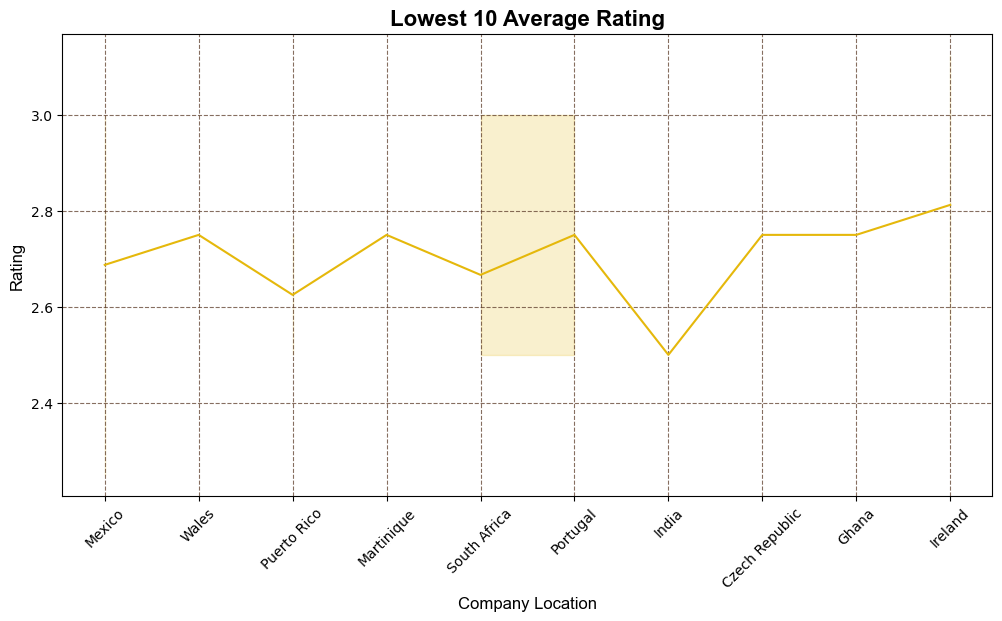

In [90]:
# Narrow down to Lowest 10 Company Locations
filtered_lowest_ten = df_cleaned[df_cleaned['company_location'].isin(lowest_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.lineplot(data=filtered_lowest_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Lowest 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

In [91]:
avg_cocoa_percent = df_cleaned.groupby("company_location")['cocoa_percent'].mean()
print(avg_cocoa_percent)

company_location
Argentina            73.333333
Australia            70.224490
Austria              72.000000
Belgium              72.025000
Bolivia              73.000000
Brazil               69.823529
Canada               72.352000
Chile                70.000000
Colombia             65.739130
Costa Rica           72.000000
Czech Republic       63.000000
Denmark              69.800000
Domincan Republic    67.000000
Ecuador              72.381818
Fiji                 75.000000
Finland              70.500000
France               71.762821
Germany              72.942857
Ghana                80.000000
Grenada              71.000000
Guatemala            70.200000
Honduras             75.000000
Hungary              72.318182
Iceland              68.666667
India                61.000000
Ireland              78.500000
Israel               70.555556
Italy                71.190476
Japan                70.764706
Lithuania            72.333333
Madagascar           71.764706
Martinique           4

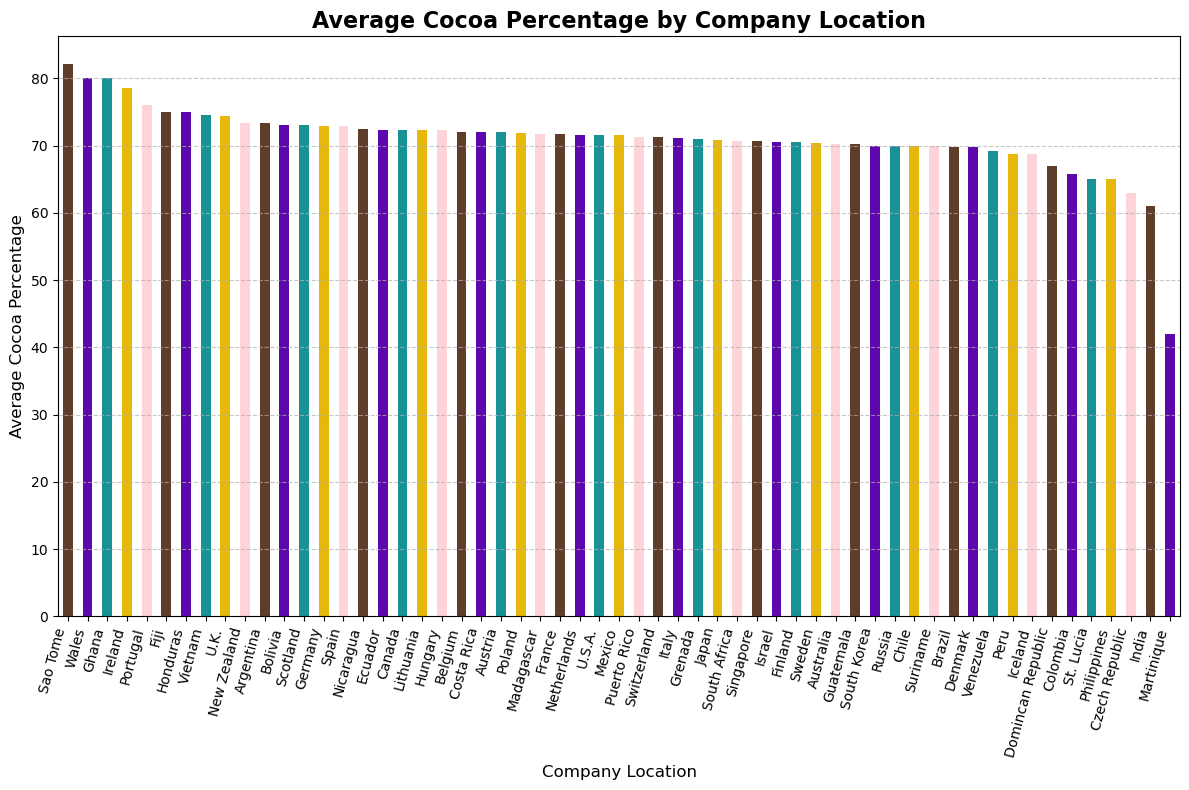

In [92]:
# Sort the data 
avg_cocoa_percent = avg_cocoa_percent.sort_values(ascending=False)

# Colors
colors = ['#5e3d2b', '#5c08ac', '#199296', '#e5b80b', '#ffd3da']

# Plot the data
plt.figure(figsize=(12, 8))  
avg_cocoa_percent.plot(kind='bar', color=colors)

# avg_cocoa_percent.plot(kind='bar', color=colors * (len(avg_cocoa_percent) // len(colors) + 1))

# Add titles and labels
plt.title("Average Cocoa Percentage by Company Location", fontsize=16, fontweight="bold")
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Average Cocoa Percentage", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save chart as image
plt.savefig("average_cocoa_percentage_by_company_location.png")

# Show the chart
plt.tight_layout()  
plt.show()


In [93]:
top_ten_countries = avg_cocoa_percent.nlargest(10)

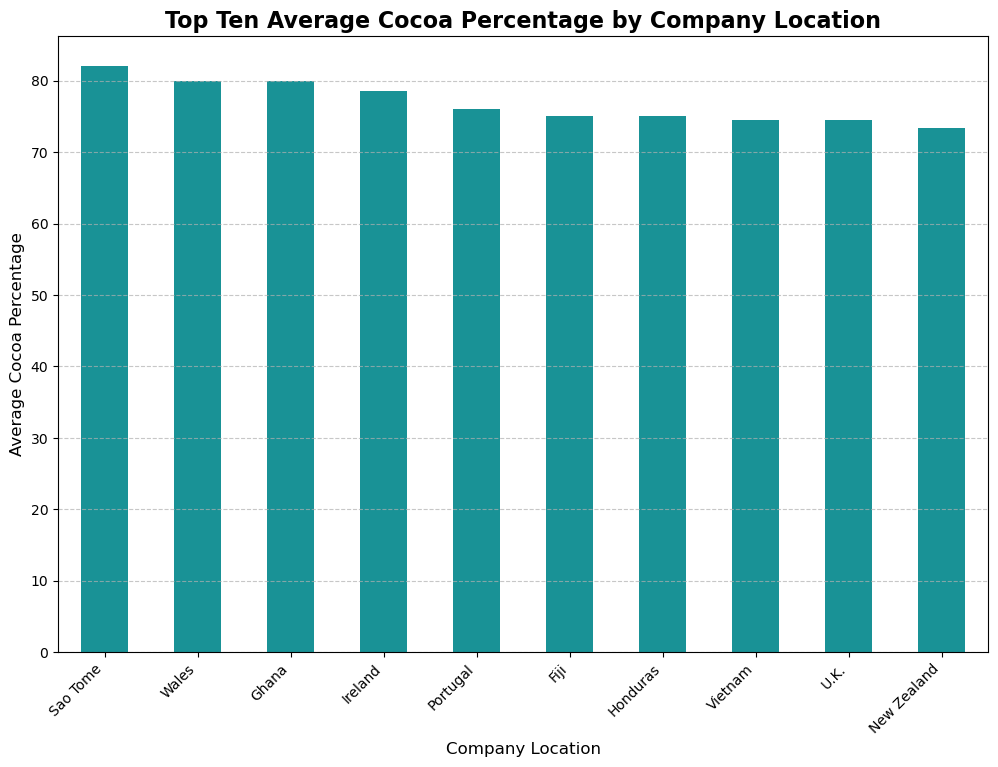

In [94]:
# Plot the data
plt.figure(figsize=(12, 8))  
top_ten_countries.plot(kind='bar', color='#199296')

# Add titles and labels
plt.title("Top Ten Average Cocoa Percentage by Company Location", fontsize=16, fontweight="bold")
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Average Cocoa Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save chart as image
plt.savefig("top_ten_average_cocoa_percentage_by_company_location.png")

# Show the chart
plt.show()